In [1]:
import os
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataset import Dataset
from pipeline import Pipeline
from visualizations import Visualizer
from sklearn.linear_model import Ridge
import sklearn.preprocessing
from sklearn.svm import LinearSVR, SVR
from sklearn.decomposition import PCA, KernelPCA
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
rmse = MeanSquaredError(square_root = True)
from scipy.linalg import LinAlgWarning
import sklearn.model_selection
import warnings
# Filter out LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)
#controling whether tensorflow does recognize GPU
tf.config.get_visible_devices("GPU")
np.random.seed(42)

In [2]:
#Inititate processing pipeline
pipeline = Pipeline(crypto_tick = "eth")
#Initiate visualizer
visualizer = Visualizer()

In [3]:
print("Missing values distribution:")
visualizer.get_missing_columns(data = pipeline.data)

Missing values distribution:


{'ETH / Addresses, active, count': [1669, '% 38.105'],
 'ETH / NVT, adjusted, 90d MA': [1767, '% 40.342'],
 'ETH / NVT, adjusted, free float,  90d MA': [1768, '% 40.365'],
 'ETH / NVT, adjusted': [1677, '% 38.288'],
 'ETH / NVT, adjusted, free float': [1677, '% 38.288'],
 'ETH / Flow, in, to exchanges, USD': [1678, '% 38.311'],
 'ETH / Flow, out, from exchanges, USD': [1678, '% 38.311'],
 'ETH / Fees, transaction, mean, USD': [1678, '% 38.311'],
 'ETH / Fees, transaction, median, USD': [1678, '% 38.311'],
 'ETH / Fees, total, USD': [1678, '% 38.311'],
 'ETH / Miner revenue, USD': [1678, '% 38.311'],
 'ETH / Capitalization, market, free float, USD': [1678, '% 38.311'],
 'ETH / Capitalization, realized, USD': [1669, '% 38.105'],
 'ETH / Capitalization, market, current supply, USD': [1678, '% 38.311'],
 'ETH / Capitalization, market, estimated supply, USD': [3092, '% 70.594'],
 'ETH / Volatility, daily returns, 30d': [1708, '% 38.995'],
 'ETH / Volatility, daily returns, 180d': [1858, '% 

/tmp/ipykernel_13019/523243249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


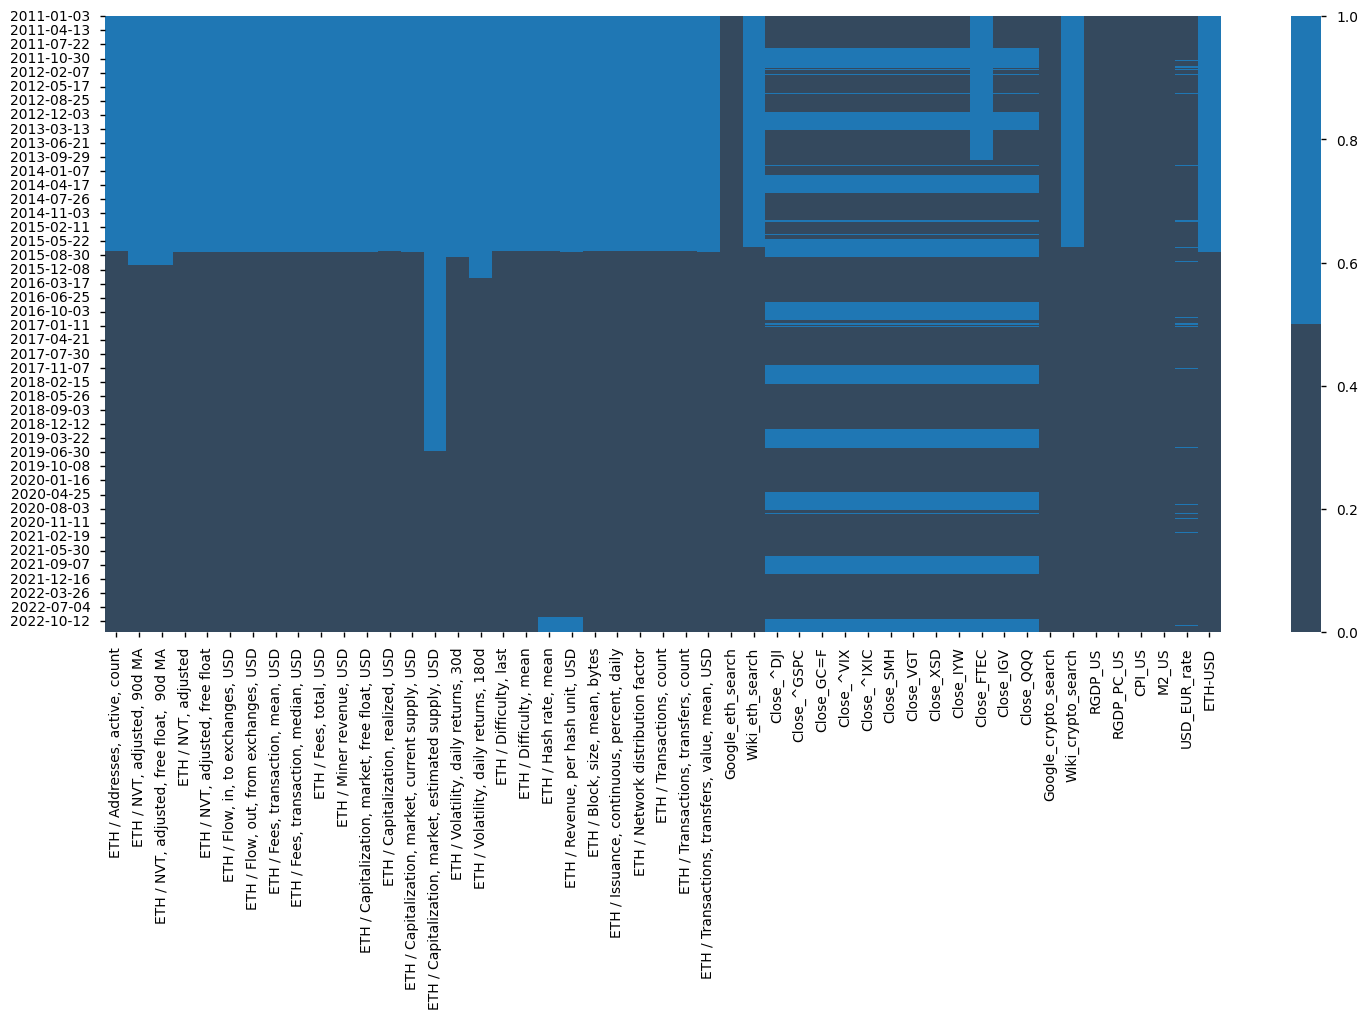

In [4]:
fig = visualizer.draw_missing_data(data = pipeline.data)
fig.show()

In [5]:
pipeline.set_beginning(start_date = "2015-08-08")

/tmp/ipykernel_13019/523243249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


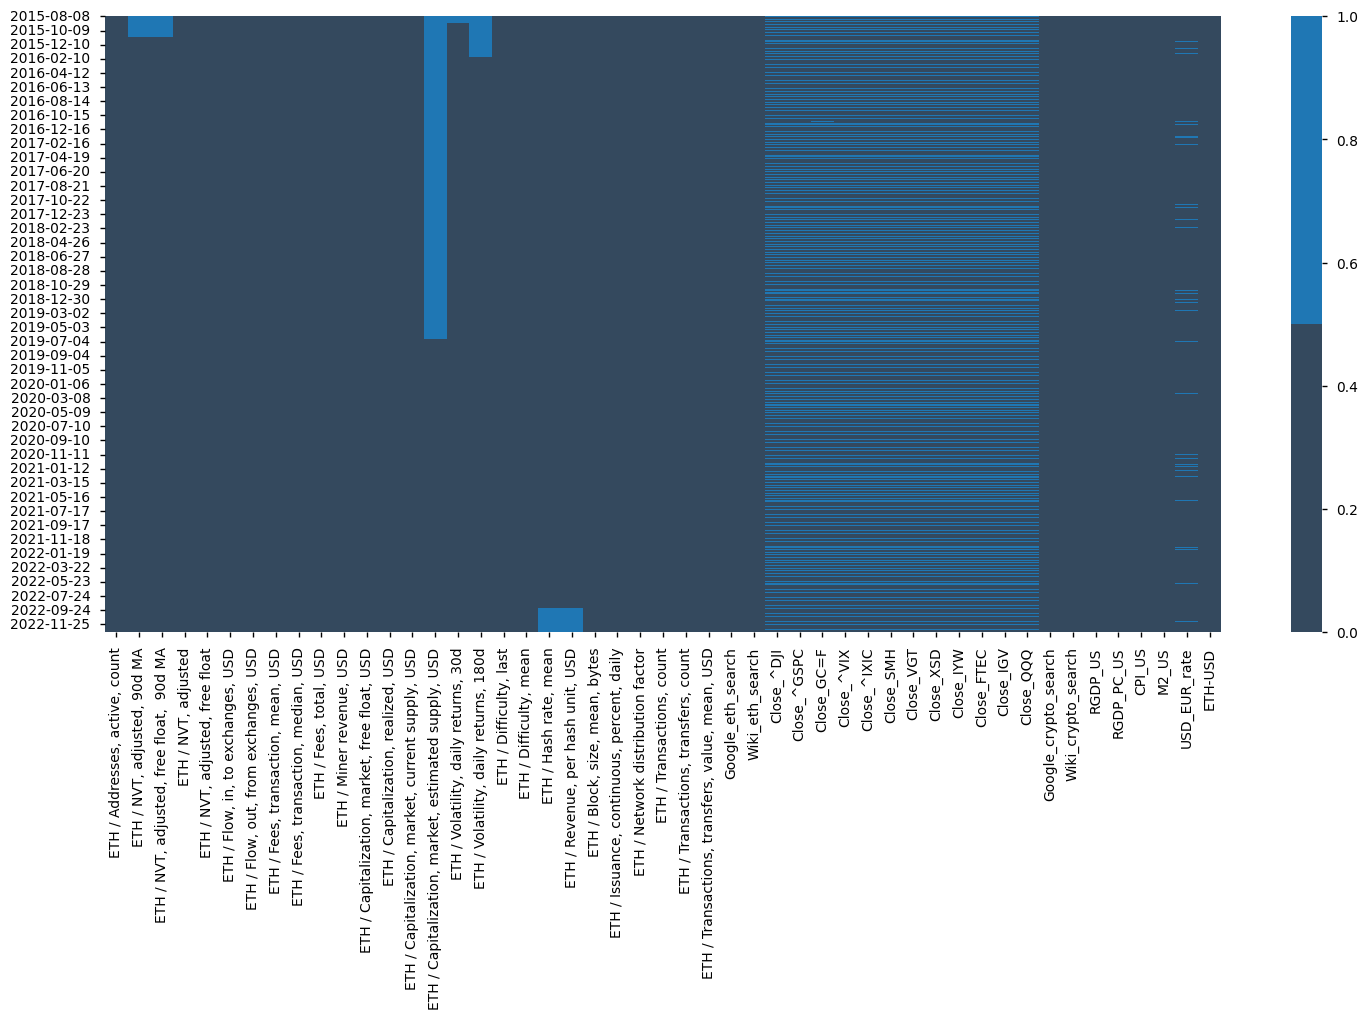

In [6]:
fig = visualizer.draw_missing_data(data = pipeline.data)
fig.show()

In [7]:
pipeline.preprocess_dataset()

/tmp/ipykernel_13019/523243249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


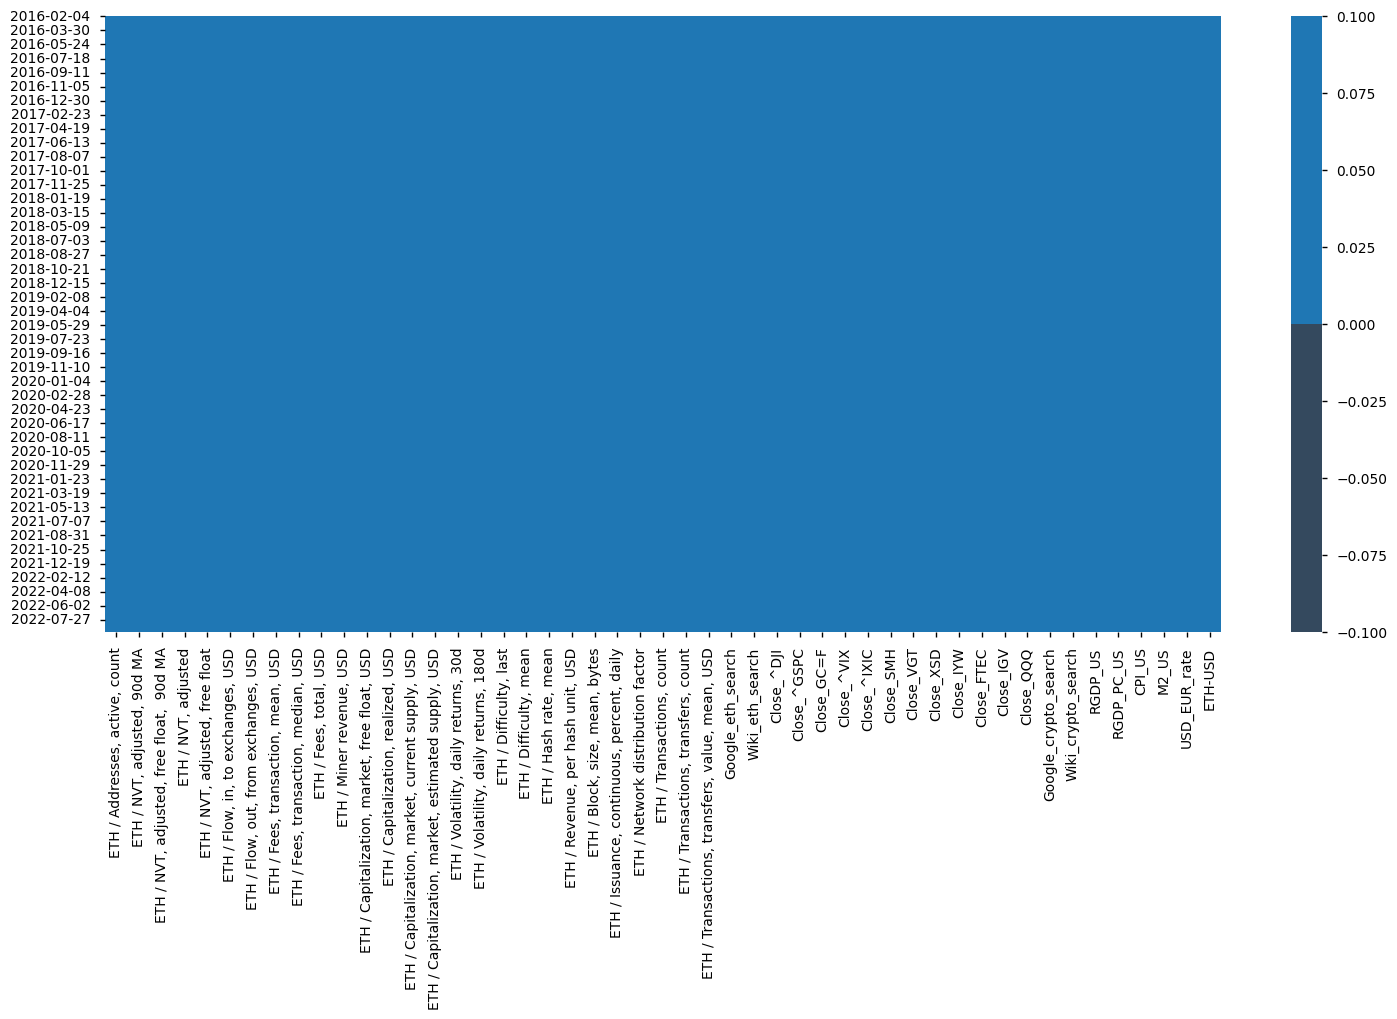

In [8]:
fig = visualizer.draw_missing_data(data = pipeline.data)
fig.show()

In [9]:
pipeline.shift_target()

In [10]:
columns = ["ETH-LR - 1 day", "ETH-LR - 5 days", 
           "ETH-LR - 10 days", "ETH-SVR - 1 day", "ETH-SVR - 5 days", 
           "ETH-SVR - 10 days", "ETH-LSTM - 1 day", "ETH-LSTM - 5 days",
           "ETH-LSTM - 10 days"]
rows = ["Full dimensionality", "95% retained variance",
        "98% retained variance", "99% retained variance"]
#presented in RMSE 
results_train_averaged = pd.DataFrame(columns = columns, index = rows)

In [11]:
columns = ["ETH-LR - 1 day", "ETH-LR - 5 days", 
           "ETH-LR - 10 days", "ETH-SVR - 1 day", "ETH-SVR - 5 days", 
           "ETH-SVR - 10 days", "ETH-LSTM - 1 day", "ETH-LSTM - 5 days",
           "ETH-LSTM - 10 days"]
rows = ["Full dimensionality", "95% retained variance",
        "98% retained variance", "99% retained variance"]
#presented in RMSEPE 
results_test = pd.DataFrame(columns = columns, index = rows)

# PCA retained variance on the whole dataset

0.6723583571696702


/tmp/ipykernel_13019/2018063168.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


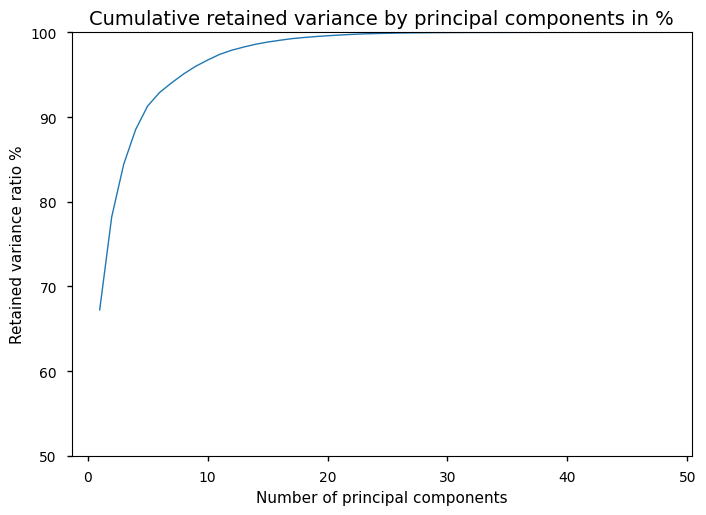

In [12]:
pca = PCA(random_state = 42)
scaler = sklearn.preprocessing.RobustScaler(unit_variance = True)
pca.fit_transform(scaler.fit_transform(pipeline.data_1d_shift.copy().iloc[:,:-1]))
fig = visualizer.draw_cumulative_varience_ratios(np.cumsum(pca.explained_variance_ratio_))
fig.show()

In [13]:
print("Explained variance by component")
pca.explained_variance_ratio_

Explained variance by component


array([6.72358357e-01, 1.09672680e-01, 6.21262165e-02, 4.11921748e-02,
       2.77758590e-02, 1.59762561e-02, 1.13802098e-02, 1.04298134e-02,
       9.01450950e-03, 7.38288489e-03, 6.67978583e-03, 4.88615613e-03,
       3.77254568e-03, 3.30076544e-03, 2.57994386e-03, 2.09057008e-03,
       1.92034967e-03, 1.32758624e-03, 1.16120527e-03, 9.78048286e-04,
       8.13680417e-04, 7.66396422e-04, 6.06125205e-04, 3.85163318e-04,
       3.40088269e-04, 3.01392673e-04, 1.92145014e-04, 1.59360068e-04,
       1.18144130e-04, 8.77115886e-05, 5.08223905e-05, 4.07010264e-05,
       3.97908086e-05, 3.20132373e-05, 1.86261575e-05, 1.39111461e-05,
       1.01988638e-05, 9.44233670e-06, 3.25542091e-06, 2.15690512e-06,
       1.02380739e-06, 6.20361202e-07, 4.17615532e-07, 3.76977896e-07,
       2.67165066e-07, 1.85192107e-07, 3.84184669e-08, 2.74518863e-08])

# Full dimensionality - baseline models

The pipeline is always shown for 1 day forecasting. 5 and 10 day forecasting is performed without further comments 

## Full dimensionality - Linear Regression

In [14]:
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [15]:
LR_PARAMETERS = {"estimator__alpha": np.linspace(0,5,20),
              "estimator__tol":[0.0001, 0.0005,0.001],
              "estimator__max_iter":[200,500,1000,2000]}
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["ETH-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.85498e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.85498e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.85498e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.85498e-27): r

## Full dimensionality - 5 and 10 days - LR

In [16]:
#5 days LR
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["ETH-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["ETH-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.86884e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.86884e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.86884e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.86884e-27): r

## Full dimensionality - Support Vector Regression

In [17]:
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [18]:
SVR_PARAMETERS = {"estimator__C": np.logspace(-10,5,10),
    "estimator__epsilon": [1, 2, 3, 3.5, 4, 4.5, 5],
              "estimator__tol":[0.0001, 0.0005,0.001],
              "estimator__max_iter":[200,500,1000,2000]}
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["ETH-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicit

In [19]:
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_)

{'estimator__C': 46.415888336127914, 'estimator__epsilon': 3.5, 'estimator__max_iter': 200, 'estimator__tol': 0.0001}
Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator',
                 LinearSVR(C=46.415888336127914, epsilon=3.5, max_iter=200,
                           random_state=42))])
-80.84088795303444


## Full dimensionality - 5 and 10 days - SVR

In [20]:
#5 days SVR
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["ETH-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)

#10 days SVR
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["ETH-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increas

/tmp/ipykernel_13019/2488864839.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


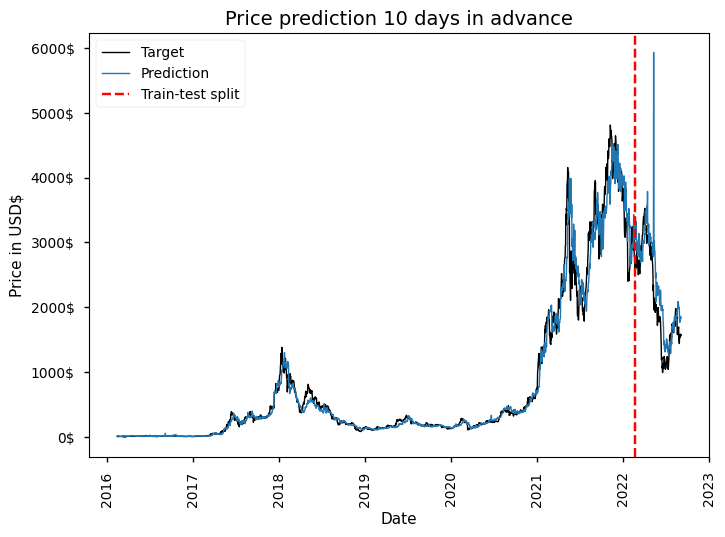

In [21]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

/tmp/ipykernel_13019/4071368209.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


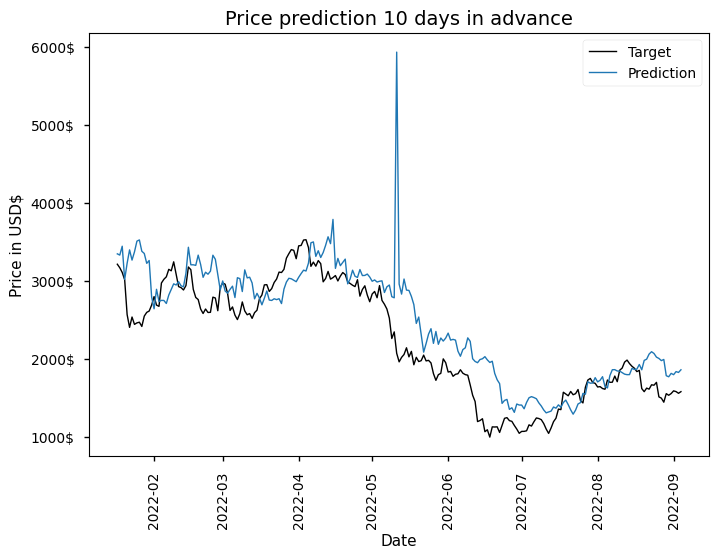

In [22]:
fig = visualizer.draw_prediction_test(test_target, test_prediction, 10)
fig.show()

## Full dimensionality - LTSM


In [26]:
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = None, shape_change = ((-1, 49), (-1,1,49)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 49))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 49))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7f3dd7e7d300>, epochs=500, input_shape=(1, 49), random_state=42, shuffle=False, units=2000, verbose=0))])

In [27]:
LSTM_PARAMETERS = {"estimator__units": [300],
    "estimator__epochs": [50]}
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
#TODO: fix scaling target sequentially (seperately for both splits)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["ETH-LSTM - 1 day"]] = rmse(minimax.inverse_transform(train_target.reshape(-1,1)), minimax.inverse_transform(model.predict(train_data).reshape(-1,1)))
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


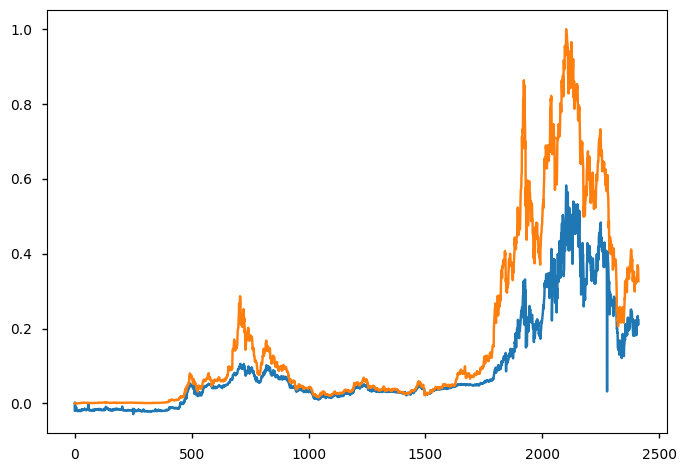

In [28]:
plt.plot(np.concatenate([model.predict(train_data),model.predict(test_data)]))
plt.plot(np.concatenate([train_target,test_target]))

## Full dimensionality - 5 and 10 days - LSTM

In [29]:
#5 days LSTM
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = None, shape_change = ((-1, 49), (-1,1,49)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["ETH-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = None, shape_change = ((-1, 49), (-1,1,49)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["ETH-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["ETH-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


# Retained 95% of variance

## Retained 95% of variance - Linear Regression

In [30]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [31]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["ETH-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [32]:
#5 days LR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["ETH-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["ETH-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 95% of variance - Support Vector Regression

In [33]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [34]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["ETH-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 95% of variance - 5 and 10 days - SVR

In [35]:
#5 days SVR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["ETH-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["ETH-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 95% of variance - LSTM

In [36]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 49))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 49))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7f3dd7e7d300>, epochs=500, input_shape=(1, 49), random_state=42, shuffle=False, units=2000, verbose=0))])

In [37]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["ETH-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


## Retained 95% of variance - 5 and 10 days - LSTM

In [39]:
#5 days LSTM
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["ETH-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["ETH-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["ETH-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


# Retained 98% of variance

## Retained 98% of variance - Linear Regression

In [40]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [41]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift)
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["ETH-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [42]:
#5 days LR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["ETH-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["ETH-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 98% of variance - Support Vector Regression

In [43]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [44]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["ETH-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 98% of variance - 5 and 10 days - SVR

In [45]:
#5 days SVR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["ETH-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["ETH-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 98% of variance - LSTM

In [46]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 49))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 49))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7f3dd7e7d300>, epochs=500, input_shape=(1, 49), random_state=42, shuffle=False, units=2000, verbose=0))])

In [47]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["ETH-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


## Retained 98% of variance - 5 and 10 days - LSTM

In [48]:
#5 days LSTM
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["ETH-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["ETH-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["ETH-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


# Retained 99% of variance

## Retained 99% of variance - Linear Regression

In [49]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.99))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [50]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["ETH-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [51]:
#5 days LR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["ETH-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["ETH-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 99% of variance - Support Vector Regression

In [52]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.99))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [53]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["ETH-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

In [55]:
#5 days SVR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["ETH-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["ETH-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

/tmp/ipykernel_13019/2488864839.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


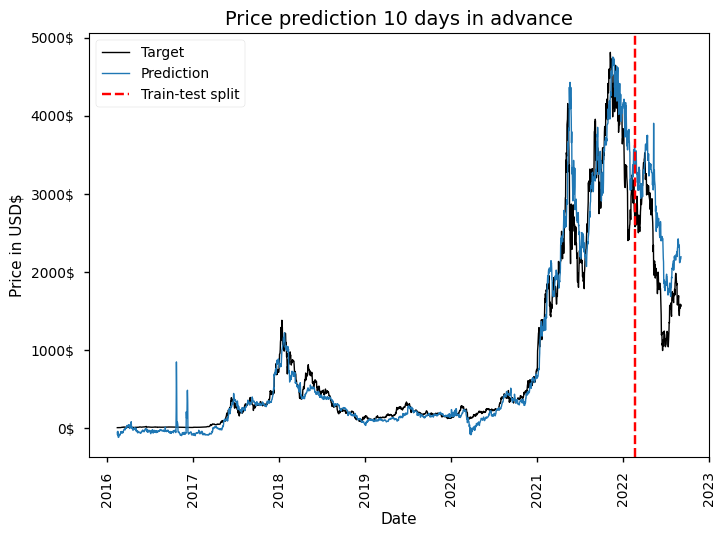

In [56]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

## Retained 99% of variance - LSTM

In [57]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 49))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.99))),
                ('scaler 2', StandardScaler()),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 49))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7f3dd7e7d300>, epochs=500, input_shape=(1, 49), random_state=42, shuffle=False, units=2000, verbose=0))])

In [58]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["ETH-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [59]:
#5 days LSTM
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["ETH-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 49),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 49), (-1,1,49)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["ETH-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["ETH-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [60]:
results_test

ETH-LR - 1 day ETH-LR - 5 days ETH-LR - 10 days  \
Full dimensionality       174.210248      453.556916        690.61666   
95% retained variance     322.155737      510.747833       620.649174   
98% retained variance     382.371201       570.77868       675.207882   
99% retained variance     622.708686       631.62999       693.382705   

                      ETH-SVR - 1 day ETH-SVR - 5 days ETH-SVR - 10 days  \
Full dimensionality        141.036863       322.179304        465.001429   
95% retained variance      372.910414       464.393281        617.178431   
98% retained variance      419.749894       489.508418        656.696725   
99% retained variance      512.114149       595.411719        663.120853   

                      ETH-LSTM - 1 day ETH-LSTM - 5 days ETH-LSTM - 10 days  
Full dimensionality         879.282862       1743.417693         554.769455  
95% retained variance       220.861171        518.611927         737.873496  
98% retained variance      1400.498436        977.569861         868.579884  
99% retained variance       310.291907        648.497225         563.791579